# [Multivariate Time Series Forecasting using RNN(LSTM)](https://medium.com/mlearning-ai/multivariate-time-series-forecasting-using-rnn-lstm-8d840f3f9aa7)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1=pd.read_csv('training_100.csv')
df1['timestamp']=pd.to_datetime(df1['timestamp'])
df1

,timestamp,kpi_value,request_count,anomaly_label
0,2020-08-14 02:00:00+02:00,0.998755,24908,0
1,2020-08-14 02:01:00+02:00,0.997683,25029,0
2,2020-08-14 02:02:00+02:00,0.998341,24115,0
3,2020-08-14 02:03:00+02:00,0.998211,24031,0
4,2020-08-14 02:04:00+02:00,0.998403,23790,0
...,...,...,...,...
20154,2020-08-28 01:56:00+02:00,0.998149,26467,0
20155,2020-08-28 01:57:00+02:00,0.998340,26502,0
20156,2020-08-28 01:58:00+02:00,0.998364,26887,0
20157,2020-08-28 01:59:00+02:00,0.998428,26712,0


In [3]:
values=df1.shape[0]
training=0.80
what_to_train=values*training

df2=df1[['timestamp', 'kpi_value', 'request_count']]
df2_date=df1[['timestamp']]
print("Training Sets")
df2_train=df2.iloc[0:int(what_to_train),1:]

df2_train["kpi_value"]=df2_train["kpi_value"].astype('float64')
df2_train["request_count"]=df2_train["request_count"].astype('int64')

df2_train.head()

Training Sets


,kpi_value,request_count
0,0.998755,24908
1,0.997683,25029
2,0.998341,24115
3,0.998211,24031
4,0.998403,23790


In [4]:
print("Testing Sets")
df2_test=df2.iloc[int(what_to_train):,1:]

df2_test["kpi_value"]=df2_test["kpi_value"].astype('float64')
df2_test["request_count"]=df2_test["request_count"].astype('int64')

df2_test.reset_index(inplace=True)
df2_test.head()

Testing Sets


,index,kpi_value,request_count
0,16127,0.996365,17055
1,16128,0.996286,16694
2,16129,0.995214,17135
3,16130,0.995925,16934
4,16131,0.995669,16394


In [5]:
print(f"For this case we have {df2_train.shape[0]} Training Sets and {df2_test.shape[0]} Training Sets.") 

For this case we have 16127 Training Sets and 4032 Training Sets.


In [6]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
df2_train_scaled=sc1.fit_transform(df2_train)
df2_train_scaled
print(df2_train_scaled.shape)

(16127, 2)


In [7]:
sc2=StandardScaler()
df2_train_scaled_y=sc2.fit_transform(df2_train[["kpi_value"]])
df2_train_scaled_y
print(df2_train_scaled_y.shape)

(16127, 1)


In [8]:
hops=14 #14 samples
no_records=df2_train_scaled_y.shape[0]
no_cols=4

X_train=[]
y_train=[]
for i in range(hops, no_records):
    X_train.append(df2_train_scaled[i-14:i])
    y_train.append(df2_train_scaled_y[i][0])
X_train, y_train=np.array(X_train), np.array(y_train)

In [9]:
print(X_train.shape)
print(y_train.shape)

(16113, 14, 2)
(16113,)


In [10]:
X_train_shape=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],X_train.shape[2]))
X_train_shape.shape

(16113, 14, 2)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

2022-12-10 16:15:02.798835: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model=Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

2022-12-10 16:15:07.040822: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 14, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,851
Trainable params: 30,851
Non-trainable params: 0
_________________________________________________________________


In [13]:
epochs=100
batch_size=32

model.fit(X_train_shape, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/100
504/504 [==============================] - 7s 10ms/step - loss: 0.1960
Epoch 2/100
504/504 [==============================] - 5s 10ms/step - loss: 0.1694
Epoch 3/100
504/504 [==============================] - 5s 10ms/step - loss: 0.1659
Epoch 4/100
504/504 [==============================] - 5s 10ms/step - loss: 0.1627
Epoch 5/100
504/504 [==============================] - 5s 10ms/step - loss: 0.1588
Epoch 6/100
504/504 [==============================] - 5s 10ms/step - loss: 0.1587
Epoch 7/100
504/504 [==============================] - 5s 10ms/step - loss: 0.1606
Epoch 8/100
504/504 [==============================] - 5s 10ms/step - loss: 0.1567
Epoch 9/100
504/504 [==============================] - 5s 10ms/step - loss: 0.1589
Epoch 10/100
504/504 [==============================] - 5s 10ms/step - loss: 0.1584
Epoch 11/100
504/504 [==============================] - 5s 9ms/step - loss: 0.1582
Epoch 12/100
504/504 [==============================] - 5s 10ms/step - loss: 0.1566
Ep

In [14]:
df1_train_last=df2_train.iloc[-hops:]
df1_test_full=df2_test[['kpi_value','request_count']]
full_df=pd.concat((df1_train_last, df1_test_full),axis=0)
#full_df=
print(full_df.shape)
full_df.head()

(4046, 2)


,kpi_value,request_count
16113,0.996972,17835
16114,0.997011,17395
16115,0.997214,17589
16116,0.996219,17986
16117,0.996787,17742


In [15]:
df1_test_full

,kpi_value,request_count
0,0.996365,17055
1,0.996286,16694
2,0.995214,17135
3,0.995925,16934
4,0.995669,16394
...,...,...
4027,0.998149,26467
4028,0.998340,26502
4029,0.998364,26887
4030,0.998428,26712


In [16]:
############### Rescaling the test pandas dataframe #############
full_df=sc1.transform(full_df)
full_df.shape

(4046, 2)

In [17]:
############# Reshaping the test pandas dataframe ###############
hops=14
no_records=full_df.shape[0]
no_cols=4
X_train_shape_pred=[]

for i in range(hops,no_records):
    X_train_shape_pred.append(full_df[i-hops:i])
X_train_shape_pred=np.array(X_train_shape_pred)
print(X_train_shape_pred.shape)

(4032, 14, 2)


In [18]:
len(X_train_shape_pred)

4032

In [19]:
ytest=model.predict(X_train_shape_pred)

126/126 [==============================] - 1s 2ms/step


In [20]:
y_final_pred=sc2.inverse_transform(ytest)
y_final_pred

array([[0.9962707 ],
       [0.9961433 ],
       [0.99625206],
       ...,
       [0.99836177],
       [0.9984464 ],
       [0.99847025]], dtype=float32)

In [21]:
final_kpi_value_pred=pd.DataFrame(y_final_pred)
final_kpi_value_pred.columns=['final_kpi_value_pred']
final_kpi_value_pred

,final_kpi_value_pred
0,0.996271
1,0.996143
2,0.996252
3,0.995697
4,0.995872
...,...
4027,0.998494
4028,0.998444
4029,0.998362
4030,0.998446


In [22]:
df2_test

,index,kpi_value,request_count
0,16127,0.996365,17055
1,16128,0.996286,16694
2,16129,0.995214,17135
3,16130,0.995925,16934
4,16131,0.995669,16394
...,...,...,...
4027,20154,0.998149,26467
4028,20155,0.998340,26502
4029,20156,0.998364,26887
4030,20157,0.998428,26712


In [23]:
fully_final=pd.concat((final_kpi_value_pred, df2_test),axis=1)
fully_final=fully_final[['kpi_value', 'final_kpi_value_pred']]
fully_final

,kpi_value,final_kpi_value_pred
0,0.996365,0.996271
1,0.996286,0.996143
2,0.995214,0.996252
3,0.995925,0.995697
4,0.995669,0.995872
...,...,...
4027,0.998149,0.998494
4028,0.998340,0.998444
4029,0.998364,0.998362
4030,0.998428,0.998446


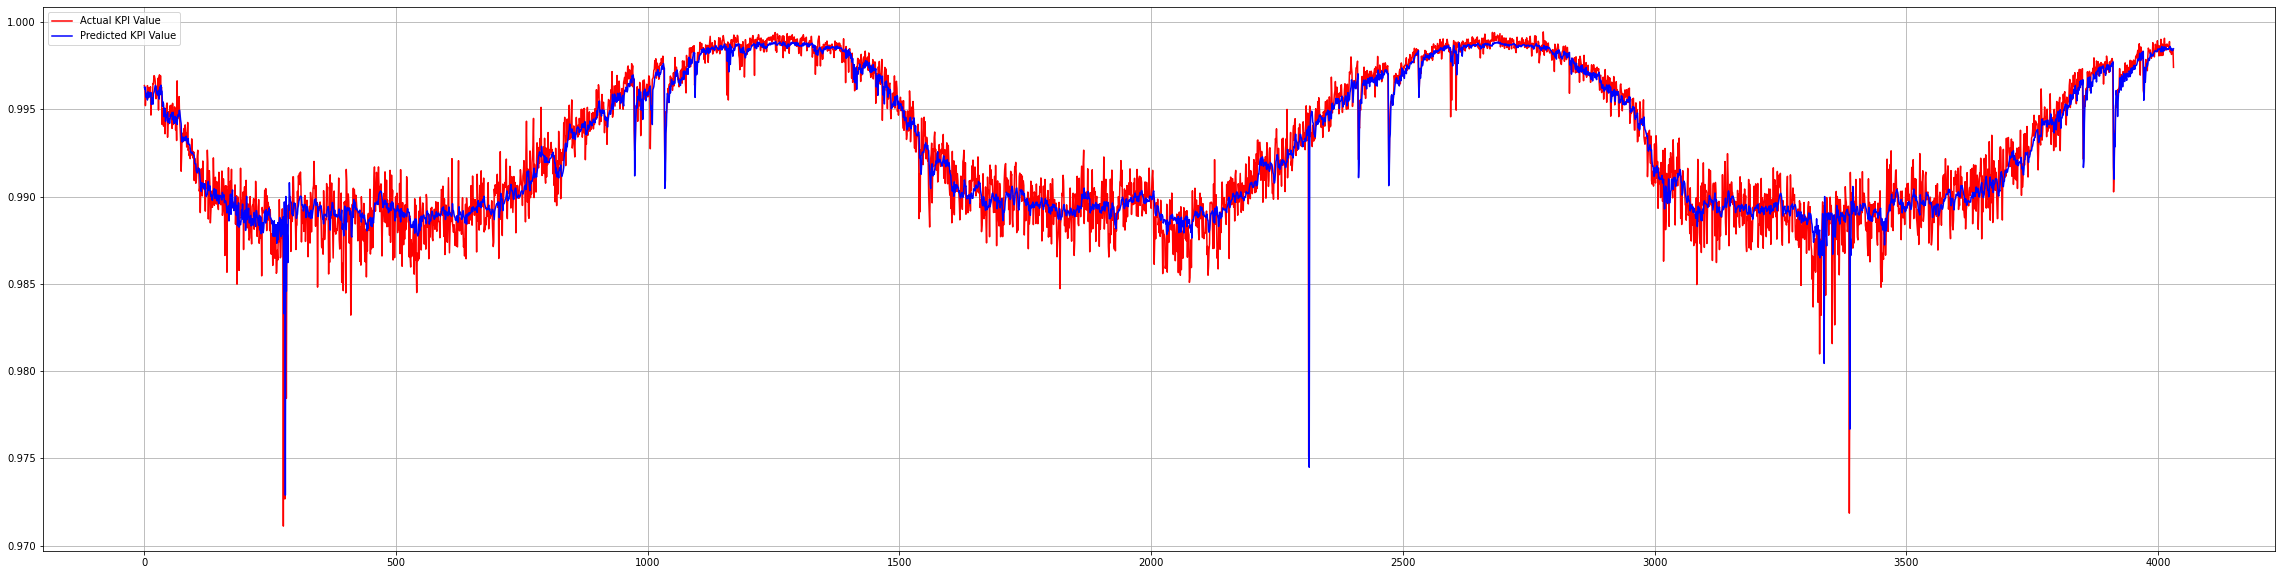

In [25]:
plt.figure(figsize=(40,10))
plt.grid()
plt.plot(fully_final['kpi_value'], label='Actual KPI Value', color='red')
plt.plot(fully_final['final_kpi_value_pred'], label='Predicted KPI Value', color='blue')
plt.legend()

**According to the results using Multivariative LSTM modeling, we are able to almost predict the KPI values correctly from the Huwaei dataset by taking 14 samples as the inputs to try to predict one output in each iteration**